In [2]:
import math
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import zipfile

# To display the matplotlib graphs next to the code
%matplotlib inline

# Lazy install libraries in-line using !pip install <library>

In [1]:
file_path = 'baby_names_all.csv.gz'

In [7]:
# Read the csv
df = pd.read_csv(file_path)

# Look at the last lines of the data frame, default is 5
df.tail()

,name,sex,count,year
1957041,Zylas,M,5,2018
1957042,Zyran,M,5,2018
1957043,Zyrie,M,5,2018
1957044,Zyron,M,5,2018
1957045,Zzyzx,M,5,2018


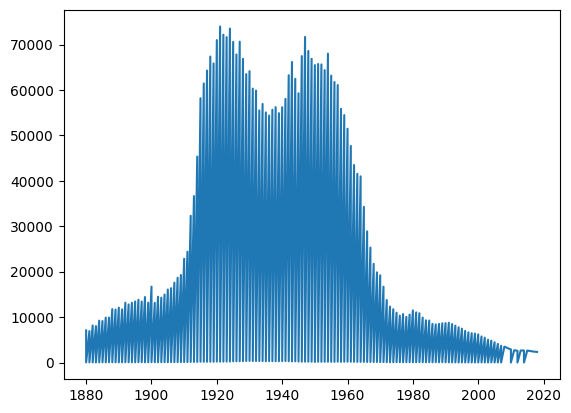

In [12]:
# Some names would recur each year, so maybe we can see the trend for one specific name for now

pp.plot(df[df['name'] == 'Mary']['year'], df[df['name'] == 'Mary']['count'],)

# The line chart needs an X and Y axis, so it needs two lists

In [14]:
# Data frame filtering was kind of difficult, what if we index it by the name and sex and year?
df_indexed = df.set_index(['sex', 'name', 'year']).sort_index()
df_indexed

count
sex name   year       
F   Aabha  2011      7
           2012      5
           2014      9
           2015      7
           2016      7
...                ...
M   Zyvion 2009      5
    Zyvon  2015      7
    Zyyon  2014      6
    Zzyzx  2010      5
           2018      5

[1957046 rows x 1 columns]

In [15]:
# Now we can search for Mary like so:
df_indexed.loc[('F', 'Mary')]

,count
year,
1880,7065
1881,6919
1882,8148
1883,8012
1884,9217
...,...
2014,2632
2015,2631
2016,2508


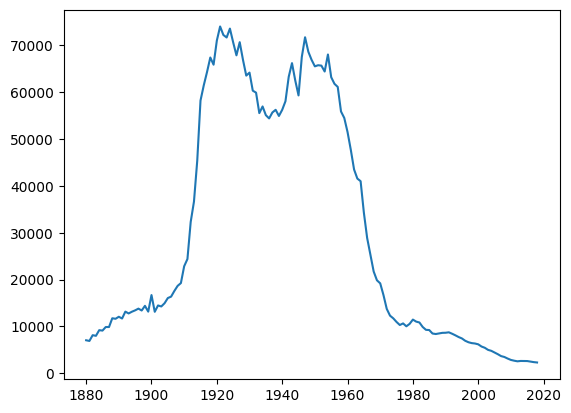

In [16]:
pp.plot(df_indexed.loc[('F', 'Mary')])

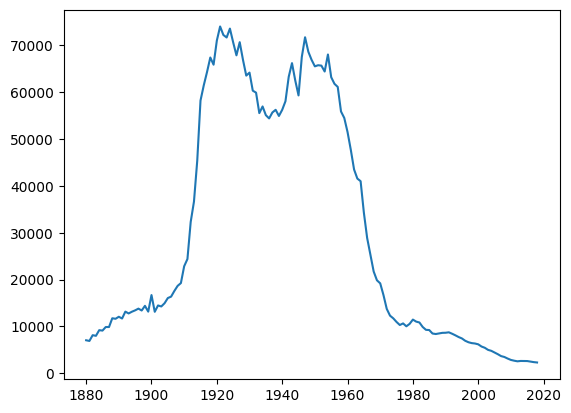

In [39]:
# Let's see how frequent the baby name Mary was by dividing it to the total number of baby names that year 

# This groups the first dataframe by 'year' column, and tallies it 
# df.groupby('year').sum()

pp.plot(df_indexed.loc[('F', 'Mary')])

In [47]:
# Define a method for the plot
def plotname(sex, name):
    data = df_indexed.loc[(sex,name)]
    # print(data)
    # /df.groupby('year').sum()
    pp.plot(data.index, data.values, label=name)
    # pp.axis(xmin=1880, xmax=2018)

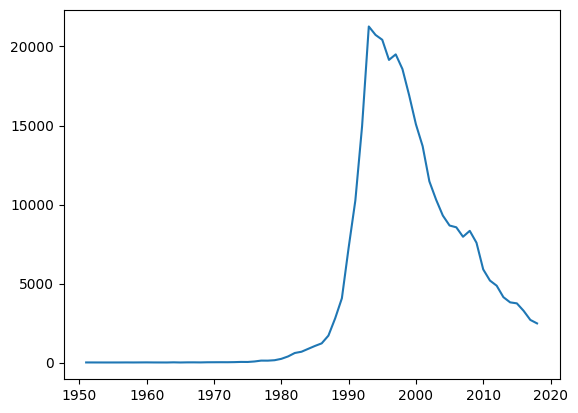

In [48]:
plotname('F', 'Taylor')

In [49]:
# Multiple names to be compared for single sex
def comparenames(sex, names):
    pp.figure(figsize=(12,2.5))

    for name in names:
        plotname(sex, name)
        
    # pp.title(names)
    pp.legend()

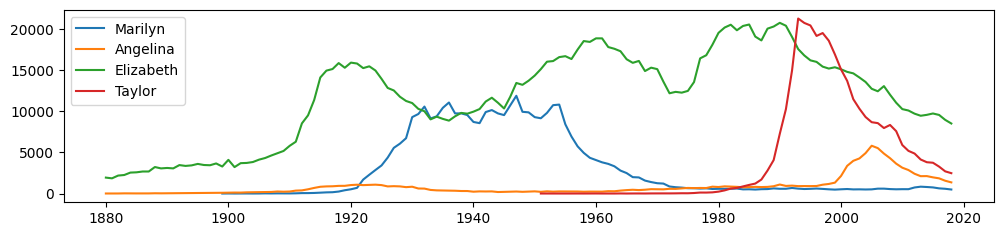

In [50]:
comparenames('F', ['Marilyn','Angelina','Elizabeth','Taylor'])

In [51]:
claires = ['Claire', 'Clare', 'Clara', 'Chiara', 'Ciara']

In [72]:
# If we want some names to be grouped... we use the years as the header 

df_indexed.loc[('F', claires), :].unstack(level=2)

count                                                          \
year          1880    1881    1882    1883    1884    1885    1886    1887   
sex name                                                                     
F   Claire    21.0    23.0    30.0    38.0    33.0    49.0    61.0    58.0   
    Clare     15.0    20.0    21.0    22.0    38.0    27.0    26.0    31.0   
    Clara   1226.0  1242.0  1490.0  1548.0  1852.0  1910.0  1916.0  1984.0   
    Chiara     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
    Ciara      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

                            ...                                          \
year          1888    1889  ...    2009    2010    2011    2012    2013   
sex name                    ...                                           
F   Claire    73.0    62.0  ...  4824.0  4915.0  4896.0  4944.0  4656.0   
    Clare     43.0    34.0  ...   405.0   421.0   414.0   379.0   377.0   
    Clara   2230.0  2319.0  ...  1647.0  1840.0  2074.0  2333.0  2504.0   
    Chiara     NaN     NaN  ...   183.0   145.0   134.0   111.0   142.0   
    Ciara      NaN     NaN  ...   888.0   699.0   554.0   475.0   436.0   

                                                    
year          2014    2015    2016    2017    2018  
sex name                                            
F   Claire  5014.0  4829.0  5209.0  4693.0  4379.0  
    Clare    386.0   389.0   394.0   315.0   357.0  
    Clara   2854.0  3064.0  3072.0  3035.0  2877.0  
    Chiara   131.0   111.0   134.0   137.0   160.0  
    Ciara    422.0   372.0   321.0   243.0   256.0  

[5 rows x 139 columns]

(1880.0, 2018.0, 0.0, 9586.5)

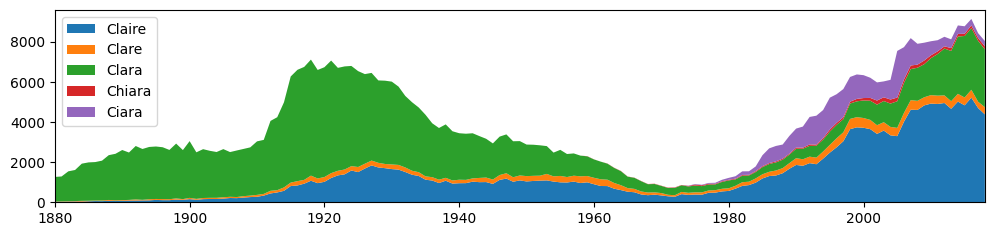

In [78]:
# Now we stack the claire names into one!

pp.figure(figsize=(12,2.5))
pp.stackplot(range(1880, 2019), df_indexed.loc[('F', claires), :].unstack(level=2).fillna(0), labels=claires)
pp.legend(loc='upper left')
pp.axis(xmin=1880, xmax=2018)

In [82]:
# Get the top 10
df.sort_values(by='count', ascending=False)

,name,sex,count,year
431066,Linda,F,99689,1947
441437,Linda,F,96211,1948
437169,James,M,94757,1947
544630,Michael,M,92704,1957
437170,Robert,M,91640,1947
...,...,...,...,...
616293,Sun,F,5,1963
616294,Sundee,F,5,1963
616295,Sunita,F,5,1963
616296,Suri,F,5,1963


In [83]:
# Get the top 10 for males

df[df['sex']=='M'].sort_values(by='count', ascending=False)

,name,sex,count,year
437169,James,M,94757,1947
544630,Michael,M,92704,1957
437170,Robert,M,91640,1947
533165,Michael,M,90656,1956
556204,Michael,M,90517,1958
...,...,...,...,...
1724038,Amaj,M,5,2011
1724037,Amahd,M,5,2011
1724036,Alyssa,M,5,2011
1724035,Alyn,M,5,2011


In [84]:
# Get the top 10 for females

df[df['sex']=='F'].sort_values(by='count', ascending=False)

,name,sex,count,year
431066,Linda,F,99689,1947
441437,Linda,F,96211,1948
451678,Linda,F,91016,1949
461947,Linda,F,80431,1950
180209,Mary,F,73985,1921
...,...,...,...,...
1158373,Adrena,F,5,1993
1158374,Adreona,F,5,1993
1158375,Adriauna,F,5,1993
1158376,Adriena,F,5,1993


In [88]:
# Seems too tedious to do, can we apply the same logic we did earlier like re-index it?

df_indexed2 =  df.set_index(['sex','year']).sort_index()

In [97]:
df_indexed2.loc['M', 2018].sort_values('count', ascending=False).head()

name  count
sex year                
M   2018     Liam  19837
    2018     Noah  18267
    2018  William  14516
    2018    James  13525
    2018   Oliver  13389

In [98]:
df_indexed2.loc['F', 2018].sort_values('count', ascending=False).head()

name  count
sex year                 
F   2018      Emma  18688
    2018    Olivia  17921
    2018       Ava  14924
    2018  Isabella  14464
    2018    Sophia  13928

In [102]:
# Create a method that gives the top 10
def getyear(sex, year):
    return (df_indexed2.loc[sex, year]
            .sort_values('count', ascending=False)
            .head(10)
            .reset_index()
            .name)

In [100]:
pd.DataFrame({year: getyear('M', year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Jacob,Jacob,Jacob,Noah,Noah,Noah,Noah,Liam,Liam
1,Ethan,Mason,Mason,Jacob,Liam,Liam,Liam,Noah,Noah
2,Michael,William,Ethan,Liam,Mason,Mason,William,William,William
3,Jayden,Jayden,Noah,Mason,Jacob,Jacob,Mason,James,James
4,William,Noah,William,William,William,William,James,Logan,Oliver
5,Alexander,Michael,Liam,Ethan,Ethan,Ethan,Benjamin,Benjamin,Benjamin
6,Noah,Ethan,Michael,Michael,Michael,James,Jacob,Mason,Elijah
7,Daniel,Alexander,Jayden,Alexander,Alexander,Alexander,Michael,Elijah,Lucas
8,Aiden,Aiden,Alexander,Jayden,James,Michael,Elijah,Oliver,Mason
9,Anthony,Daniel,Aiden,Daniel,Daniel,Benjamin,Ethan,Jacob,Logan


In [101]:
pd.DataFrame({year: getyear('F', year) for year in range(2010,2019)})

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Isabella,Sophia,Sophia,Sophia,Emma,Emma,Emma,Emma,Emma
1,Sophia,Isabella,Emma,Emma,Olivia,Olivia,Olivia,Olivia,Olivia
2,Emma,Emma,Isabella,Olivia,Sophia,Sophia,Ava,Ava,Ava
3,Olivia,Olivia,Olivia,Isabella,Isabella,Ava,Sophia,Isabella,Isabella
4,Ava,Ava,Ava,Ava,Ava,Isabella,Isabella,Sophia,Sophia
5,Emily,Emily,Emily,Mia,Mia,Mia,Mia,Mia,Charlotte
6,Abigail,Abigail,Abigail,Emily,Emily,Abigail,Charlotte,Charlotte,Mia
7,Madison,Madison,Mia,Abigail,Abigail,Emily,Abigail,Amelia,Amelia
8,Chloe,Mia,Madison,Madison,Madison,Charlotte,Emily,Evelyn,Harper
9,Mia,Chloe,Elizabeth,Elizabeth,Charlotte,Harper,Harper,Abigail,Evelyn


In [152]:
def plottopnames(sex, name):
    data = df.query('sex == @sex and name == @name')
    # print(len(data['year']))
    # print(len(data['count']))
    # print(type(data.year))
    pp.plot(data['year'], data['count'], label=name)
    pp.legend()
    pp.axis(xmin=1880, xmax=2018)

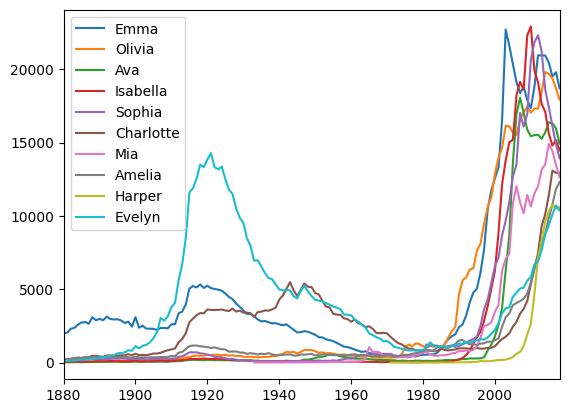

In [153]:
for name in getyear('F', 2018):
    plottopnames('F', name)

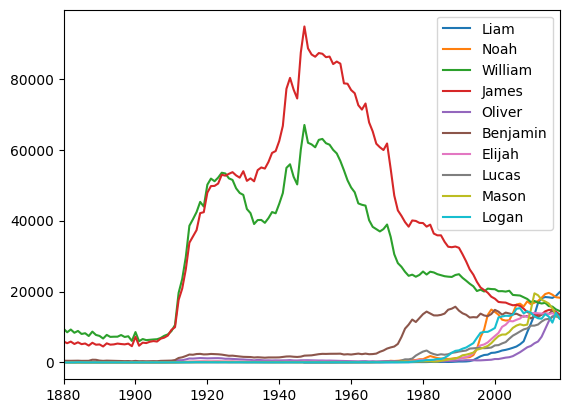

In [154]:
for name in getyear('M', 2018):
    plottopnames('M', name)

In [156]:
list(getyear('M', 2018))

['Liam',
 'Noah',
 'William',
 'James',
 'Oliver',
 'Benjamin',
 'Elijah',
 'Lucas',
 'Mason',
 'Logan']

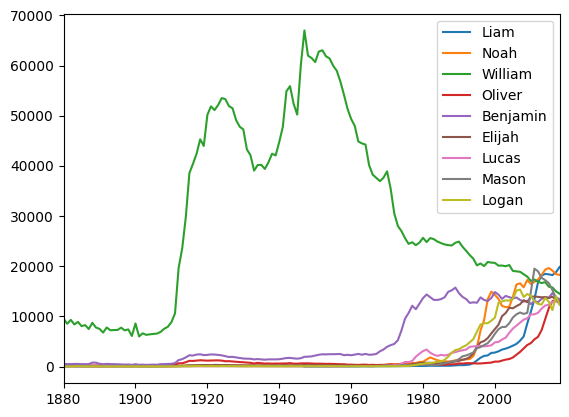

In [159]:
for name in ['Liam',
 'Noah',
 'William',
#  'James',
 'Oliver',
 'Benjamin',
 'Elijah',
 'Lucas',
 'Mason',
 'Logan']:
    plottopnames('M', name)

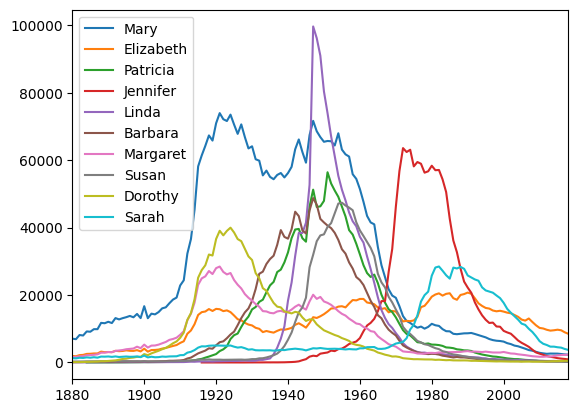

In [173]:
# All time female names top
alltime_female_names = df_indexed2.loc['F'].groupby('name').sum().sort_values('count', ascending=False).head(10)
alltime_female_names

for name in alltime_female_names.index:
    plottopnames('F', name)


,name,count
year,,
1880,Mary,7065
1880,Anna,2604
1880,Emma,2003
1880,Elizabeth,1939
1880,Minnie,1746
...,...,...
2018,Zymirah,5
2018,Zynah,5
2018,Zyniyah,5


In [181]:
# Top 10 UNISEX Names
# Plot popularity vs YEAR for both male and female versions

In [267]:
summ_all = df.groupby(['sex','name']).sum()[['count']]
summ_all

count
sex name            
F   Aabha         35
    Aabidah        5
    Aabriella     38
    Aada          13
    Aadaya         8
...              ...
M   Zyus          11
    Zyvion         5
    Zyvon          7
    Zyyon          6
    Zzyzx         10

[109173 rows x 1 columns]

In [225]:
male, female = summ_all.loc['M'] , summ_all.loc['F']

In [245]:
# Now we can see which names actually exist on both sexes given the ratio

ratios = (male / female)
top_10_unisex = ratios[(ratios >0.5) & (ratios <2)].dropna().sort_values('count', ascending=False)
top_10_unisex

,count
name,
Kamerin,1.995475
Ivery,1.992500
Bowie,1.989407
Trenell,1.986111
Man,1.980392
...,...
Malijah,0.505051
Dailey,0.504950
Zailyn,0.504808


In [257]:
common = (male.loc[top_10_unisex.index] + female.loc[top_10_unisex.index]).sort_values(by='count', ascending=False).head(10)
common

,count
name,
Jessie,277674
Riley,201179
Casey,186947
Jackie,169199
Peyton,120657
Jaime,117885
Kerry,98195
Kendall,93317
Jody,86971


In [256]:
# Let's create the group by name/year/sex
df_indexed3 = df.set_index(['sex', 'name', 'year']).sort_index()
df_indexed3

count
sex name   year       
F   Aabha  2011      7
           2012      5
           2014      9
           2015      7
           2016      7
...                ...
M   Zyvion 2009      5
    Zyvon  2015      7
    Zyyon  2014      6
    Zzyzx  2010      5
           2018      5

[1957046 rows x 1 columns]

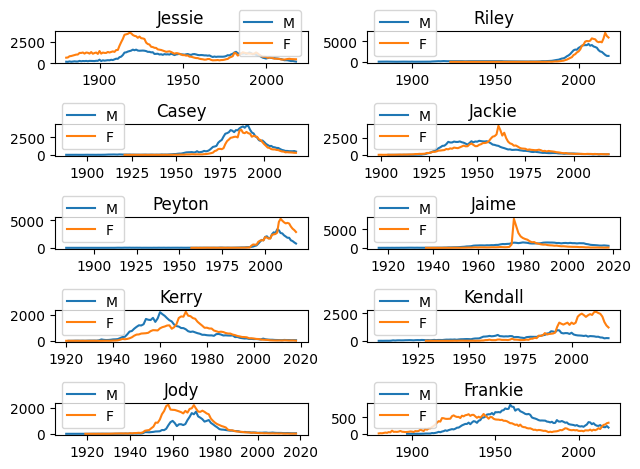

In [266]:
for i, name in enumerate(common.index):

    pp.subplot(5,2,i+1)
    pp.plot(df_indexed3.loc['M', name], label ='M')
    pp.plot(df_indexed3.loc['F', name], label ='F')

    pp.legend()
    pp.title(name)

pp.tight_layout()

In [ ]:
d